In [14]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [15]:
import base64
def load_image(inputs: dict) -> dict:
    """Load image from file and encode it as base64."""
    image_path = inputs["./ghega-dataset/datasheets/sharp-led-1/document-001-115484.out.000.png"]
  
    def encode_image(image_path):
        with open(image_path, "rb") as image_file:
            return base64.b64encode(image_file.read()).decode('utf-8')
    image_base64 = encode_image(image_path)
    return {"image": image_base64}

In [16]:
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

In [17]:
image_path = "../ghega-dataset/datasheets/sharp-led-1/document-001-115484.out.000.png"

In [18]:
base64_image = encode_image(image_path)

In [19]:
from langchain_core.messages import SystemMessage

system_message = SystemMessage(
    content=[
        {
            "type": "text", 
            "text": "You are a helpful assistant who is exceptionally good in extracting data from given image. Extract the information required in pydantic object"},
    ],
)
# response = model.invoke([message])
# print(response.content)

In [20]:
from langchain_core.messages import HumanMessage

human_message = HumanMessage(
    content=[
        {
            "type": "text", 
            "text": "You are a helpful assistant who is exceptionally good in extracting data from given image..extract the information required in pydantic object"},
        {
            "type": "image_url",
            "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"},
        },
    ],
)
# response = model.invoke([message])
# print(response.content)

In [21]:
final_prompt = (system_message + human_message)

ChatPromptTemplate(input_variables=[], input_types={}, partial_variables={}, messages=[SystemMessage(content=[{'type': 'text', 'text': 'You are a helpful assistant who is exceptionally good in extracting data from given image. Extract the information required in pydantic object'}], additional_kwargs={}, response_metadata={}), HumanMessage(content=[{'type': 'text', 'text': 'You are a helpful assistant who is exceptionally good in extracting data from given image..extract the information required in pydantic object'}, {'type': 'image_url', 'image_url': {'url': ''}}], additional_kwargs={}, response_metadata={})])
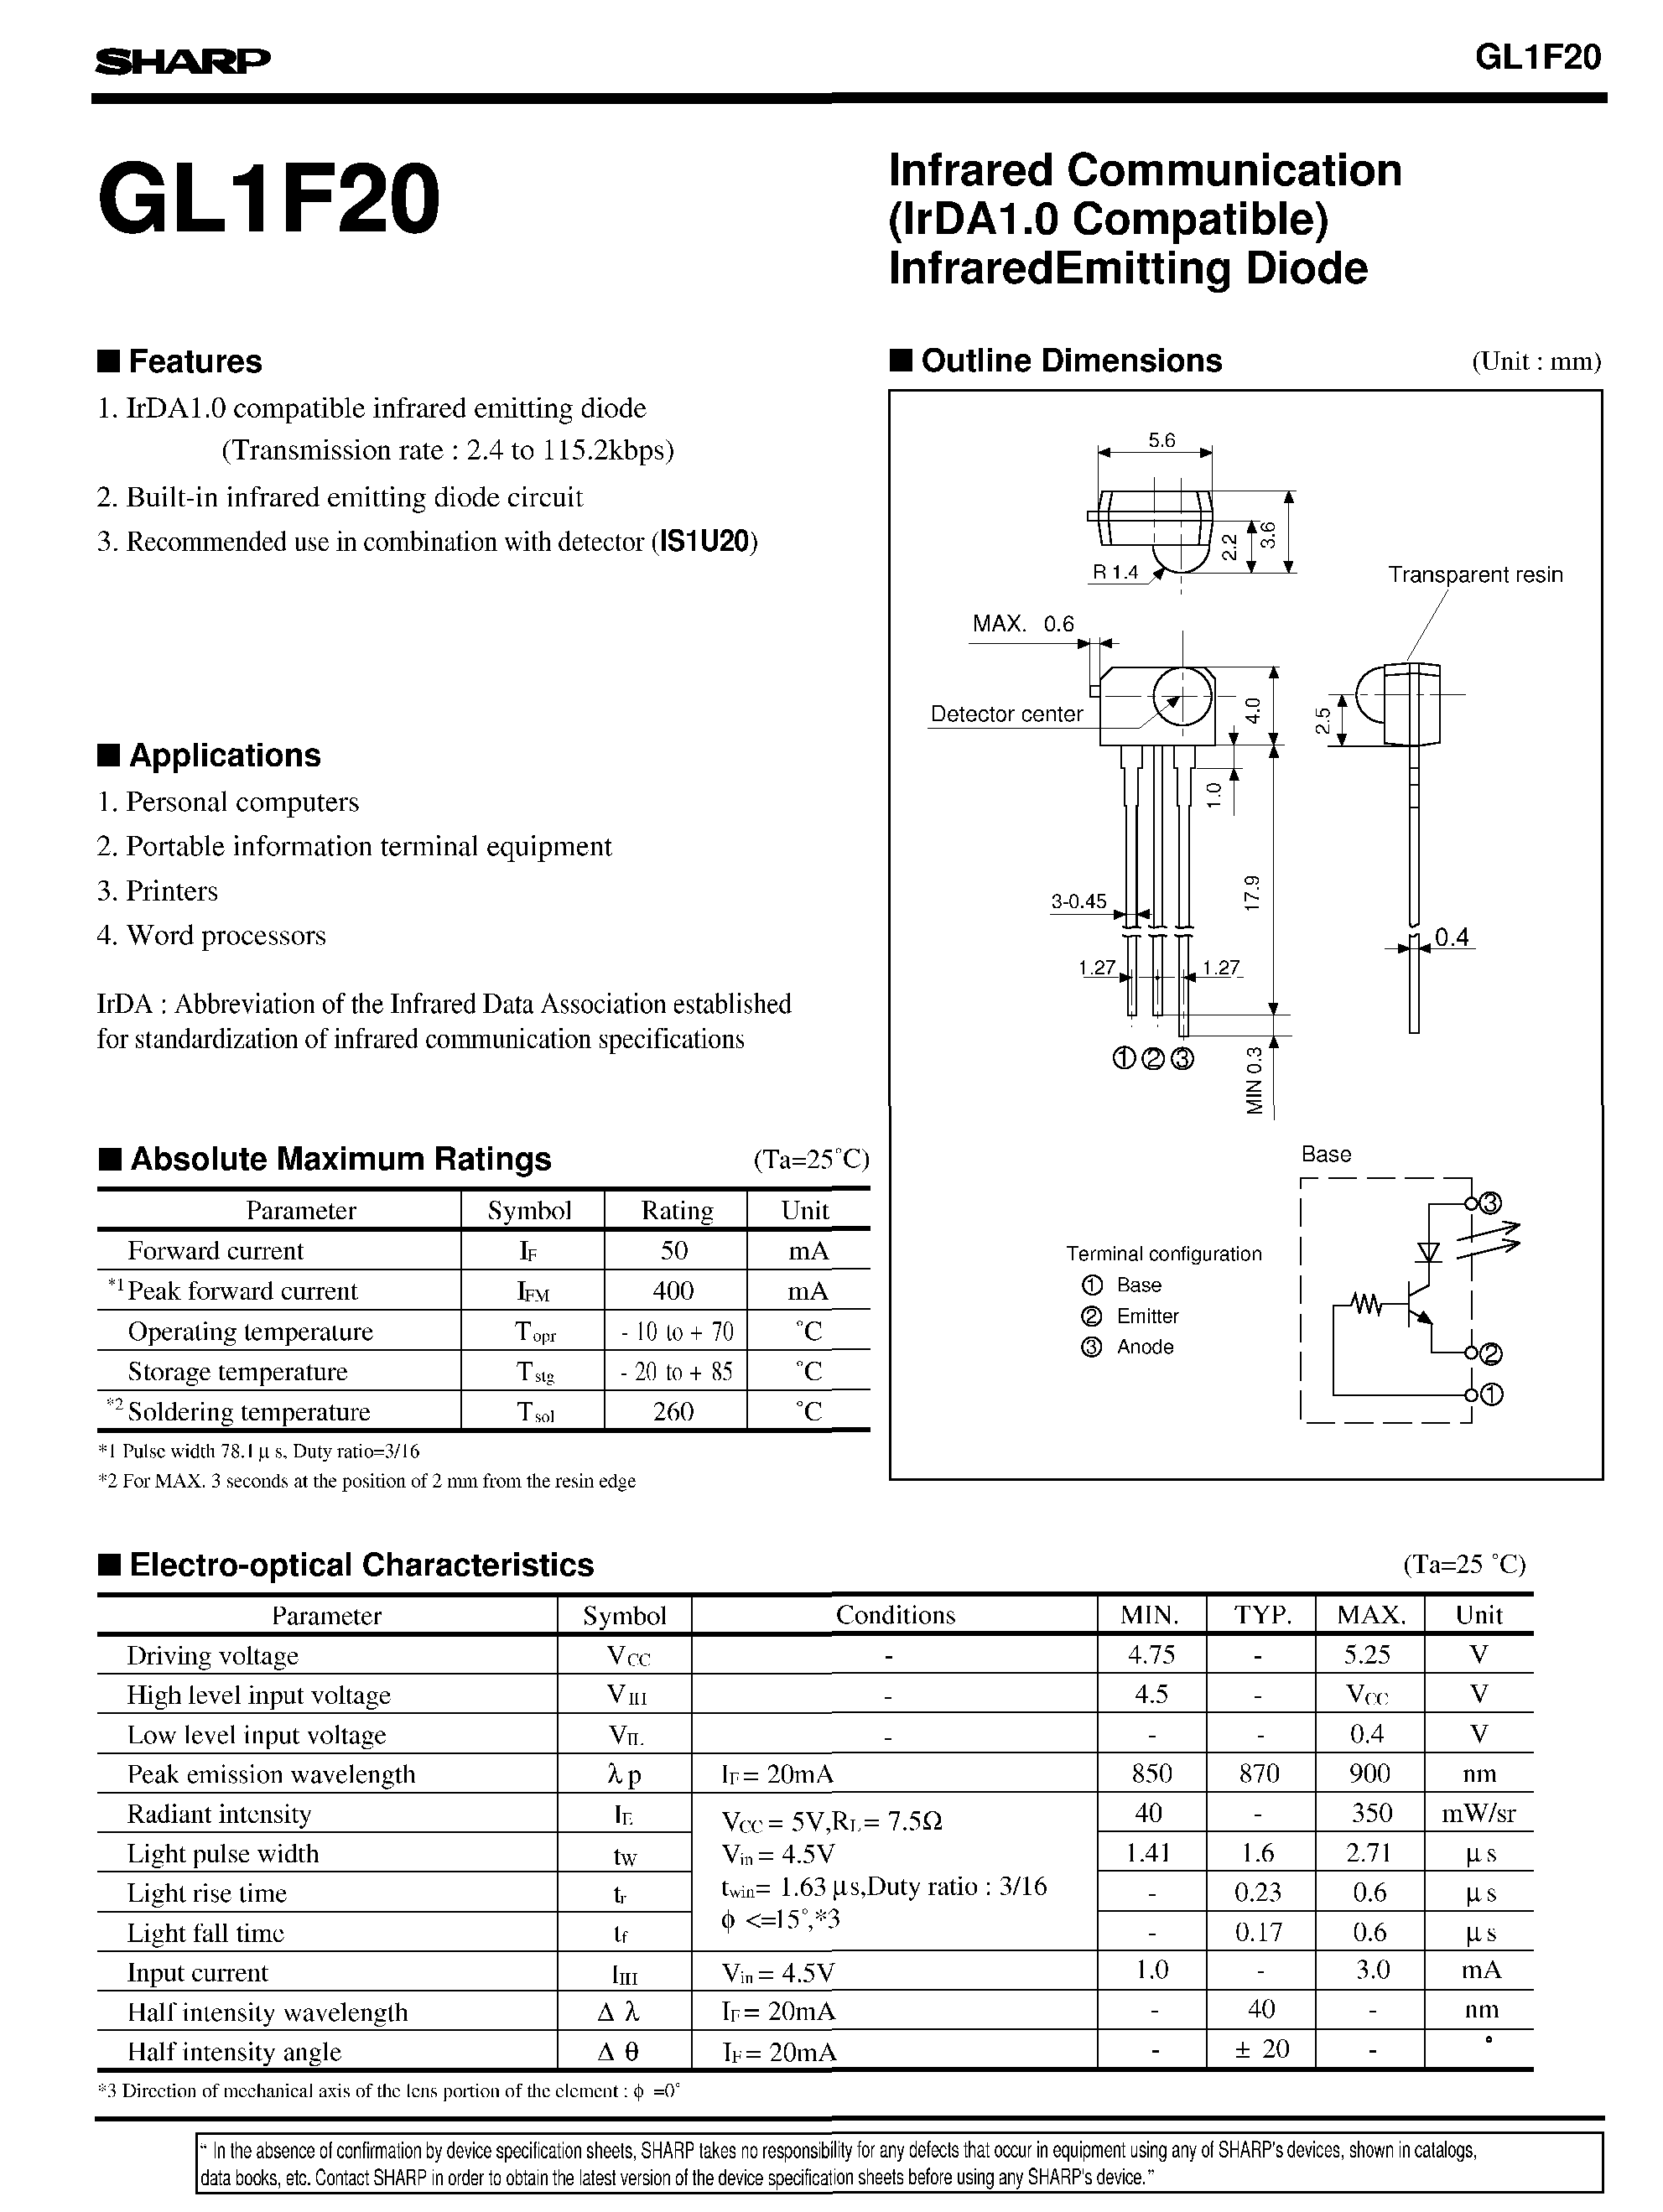

In [22]:
final_prompt

In [23]:
final_message=final_prompt.format()

In [24]:
type(final_message)

str

In [42]:
from langchain_google_genai import ChatGoogleGenerativeAI

model = ChatGoogleGenerativeAI(model="gemini-1.5-flash")


In [43]:
from typing import Optional

from pydantic import BaseModel, Field

class ElectricalSpecifications(BaseModel):
    forward_current: float = Field(..., description="Forward current in amperes.")
    peak_forward_current: float = Field(..., description="Peak forward current in amperes.")
    operating_temperature: float = Field(..., description="Operating temperature in degrees Celsius.")
    storage_temperature: float = Field(..., description="Storage temperature in degrees Celsius.")
    soldering_temperature: float = Field(..., description="Soldering temperature in degrees Celsius.")

In [44]:
structured_llm = model.with_structured_output(ElectricalSpecifications)


In [45]:
response = structured_llm.invoke([system_message,human_message])


In [46]:
response

ElectricalSpecifications(forward_current=50.0, peak_forward_current=400.0, operating_temperature=70.0, storage_temperature=85.0, soldering_temperature=260.0)

In [47]:
def convert_to_json(specs: ElectricalSpecifications) -> str:
    """Convert a Pydantic model instance to JSON string."""
    return specs.json()

In [48]:
json_output = convert_to_json(response)
print(json_output)

{"forward_current":50.0,"peak_forward_current":400.0,"operating_temperature":70.0,"storage_temperature":85.0,"soldering_temperature":260.0}
